# **# Introduction**

In today's competitive landscape, understanding customer sentiment is crucial for building loyalty and brand equity. We propose a framework that integrates diverse data sources, including news, customer surveys, social media, and employee feedback. 

While most researh has been pointing towards leveraging Regenerative Augmented Generation(RAG) in which case the sentiment data is stored in a context vector store RAG does not use the full context of the data each time a query is gnerated by user, but rather do a similarity search after a quick scan of the context data to bring the nearest neighbours to the mentioned words.
This approach is not effective as it leads to a lot of hallucinations and some data such as medical data needs precise and accurate data not generalizations. 



# **Enters Gemini 1.5**

Gemini 1.5 Pro offers several significant advantages over short-form context models, Retrieval Augmented Generation (RAG) techniques, and vector stores when dealing with long-form context and data from various sources.

1. Extended Context Length:
Vast Input Capacity: Gemini 1.5 Pro can process inputs of up to millions of tokens, significantly surpassing the limitations of short-form context models.
Improved Contextual Understanding: This extended context length allows the model to better understand the nuances and relationships within long, complex documents.
2. High Recall:
Accurate Information Retrieval: Gemini 1.5 Pro consistently achieves high recall rates, even with extremely long inputs. This means it is more likely to retrieve relevant information from the context.
Superior Performance: Compared to other models like Claude 2.1, Gemini 1.5 Pro demonstrates superior recall performance, especially at longer context lengths.
3. Multimodal Capabilities:
Unified Understanding: Gemini 1.5 Pro can process and understand information from multiple modalities, including text, audio, and video. This enables it to handle complex, real-world scenarios more effectively.
Enhanced Contextual Awareness: By incorporating information from different sources, the model can gain a deeper understanding of the context and provide more comprehensive responses.
4. Efficiency and Scalability:
Optimized Processing: Gemini 1.5 Pro is designed to process long-form context efficiently, making it suitable for large-scale applications.
Scalability: The model can handle massive amounts of data, making it ideal for tasks that require processing extensive information.
5. Reduced Reliance on External Tools:
Self-Sufficiency: Unlike RAG techniques that rely on external retrieval systems, Gemini 1.5 Pro can handle long-form context directly, reducing the need for additional components.
Simplified Workflow: This self-sufficiency streamlines the process and can lead to improved performance and efficiency.

# Setup

In [ ]:
!pip install 

**Import necessary packages**

In [2]:
import pandas as pd

# **# Methodology**

We integrate a knowledge graph with Gemin 1.5-pro pre-trained Generative AI (GenAI) model to facilitate querying sentiment-related data using natural language by first interpreting user prompts into a cypher retrieval query. The retrieved result is then fed into the Gemini 1.5 model to derive context over longer periods and to link data from various data sources within one context engine.

The process involves three key steps: 
1 understanding natural language queries, 
2 translating the queries into Cypher (Neo4j’s query language), and 
3 using the Gemini 1.5 to retrieve and analyze sentiment data.


# **# Datasets**

We make use of 6 datasets\
[1. SENT_Facebook_Graph
](http://https://www.kaggle.com/datasets/tomthescientist/netflix-facebook-posts-as-sentences-for-llm-input)\
[2. SENT_Twitter_Graph](http://https://www.kaggle.com/datasets/tomthescientist/netflix-twitter-posts-sentences-for-llm-processing)\
[3. SENT_NewsHeadlines_Graph](http://https://www.kaggle.com/datasets/tomthescientist/financial-headline-news)\
[4. SENT_CSAT_Graph](http://https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction)\
[5. SENT_EmployeeGlassdoor_Graph](http://https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews)\
[6. SENT_AppStore_Graph](http://https://www.kaggle.com/datasets/ashishkumarak/netflix-reviews-playstore-daily-updated)
   

# 1.**Facebook Comments**


In [10]:
#Connect to facebook posts and check the data
fb_sentences=pd.read_csv('/kaggle/input/netflix-facebook-posts-as-sentences-for-llm-input/netflix_fb_sentences.csv')
fb_sentences.head()

,Sentence
0,"Raymond Stewart commented ""Why isn't everyone ..."
1,"Nichole Bradley commented ""The CGI in Tiny Pre..."
2,"Jamie Shields commented ""The characters in Gen..."
3,"Summer Mahoney commented ""I wish the supportin..."
4,"Barbara Webb commented ""Netflix really knows h..."


# 2. **Twitter Posts/Comments**

In [3]:
#Connect to Twitter posts and check the data
twitter_sentences=pd.read_csv('/kaggle/input/netflix-twitter-posts-sentences-for-llm-processing/twitter_sentences.csv')
twitter_sentences.head()

,Sentence
0,"Bartosz Wasilewski commented ""Money Heist is s..."
1,"Renata Piatek commented ""Stranger Things took ..."
2,"Jennifer Williams commented ""If you’re looking..."
3,"Aneta Krol commented ""If you’re looking for a ..."
4,"Ma Li commented ""Gotta love Netflix for giving..."


# 3. News Headlines

This dataset contains news headlines from various companies with a section containing Netflix news used for enhancing context to this data

In [4]:
#Connect to Twitter posts and check the data
news_df=pd.read_csv('/kaggle/input/financial-headline-news/headlines.csv')
news_df.head()

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02


**Make News Headlines into Sentences**

In [29]:
filtered_news_df= news_df[news_df['ticker']=='NFLX']

# Create a list to store the sentences.
sentences = []

# Loop through each row in the filtered dataframe.
for index, row in filtered_news_df.iterrows():
    # Create a sentence using the values from the current row.
    sentence = f"News Headline \"{row['headline']}\" on {row['date']}"
    
    # Add the sentence to the list.
    sentences.append(sentence)

# Convert the list of sentences into a DataFrame
sentences_df = pd.DataFrame(sentences, columns=['Sentence'])

# Save the DataFrame as a CSV file
sentences_df.to_csv('news_sentences_output.csv', index=False)
sentences_df.tail()

,Sentence
374,"News Headline ""Netflix (NASDAQ:NFLX) Chief Con..."
375,"News Headline ""Wells Fargo sours on Netflix (N..."
376,"News Headline ""JPMorgan is constructive on Net..."
377,"News Headline ""Netflix (NASDAQ:NFLX) plans to ..."
378,"News Headline ""Shares of Netflix (NASDAQ:NFLX)..."


# 4. CSAT Internal Survey Data

In [11]:
#Connect to Twitter posts and check the data
csat_df=pd.read_csv('/kaggle/input/ecommerce-customer-service-satisfaction/Customer_support_data.csv')
csat_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


**Filter Relevant data**

In [24]:
# filtered_csat data
filtered_csat_df=csat_df.dropna(subset='Customer Remarks')
filtered_csat_df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
11,4c28acf4-2ea4-4be8-b8f1-113e676fc8b7,Inbound,Order Related,Delayed,Very bad,55bbace3-eb2e-4f67-aacb-4f8ee8512f75,19/07/2023 23:50,02/08/2023 10:44,02/08/2023 11:14,02-Aug-23,NAGPUR,LifeStyle,434.0,NaN,Stanley Hogan,Harper Wong,Emily Chen,>90,Split,1
17,c54459b3-ffb3-4ffa-a338-6fd179beb6b1,Inbound,Order Related,Installation/demo,Something,0cdaa1f1-02f2-40ec-9134-7cd0f92a6b3e,NaN,01/08/2023 10:00,01/08/2023 10:04,01-Aug-23,NaN,NaN,NaN,NaN,Jennifer May,Zoe Yamamoto,William Kim,On Job Training,Morning,3
19,6e51734e-9627-4a12-8062-877c3638627d,Inbound,Order Related,Installation/demo,All good,8a1ae638-4d8c-4a5e-bf1b-eb74f881fc3d,18/07/2023 12:20,02/08/2023 20:03,02/08/2023 20:05,02-Aug-23,NAGPUR,Electronics,15990.0,NaN,David Butler,Olivia Wang,Emily Chen,31-60,Evening,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85887,4b666b79-a622-4e88-b284-bbb7e5d887cf,Inbound,Returns,Reverse Pickup Enquiry,If the customer care guy and their supervisors...,330cff59-5fa6-4ffb-a5b7-64d736d375c3,NaN,31/08/2023 22:12,31/08/2023 22:20,31-Aug-23,NaN,NaN,NaN,NaN,Robert Lara,Brayden Wong,John Smith,31-60,Evening,1
85888,e88a149f-3f87-4d8f-9e2f-3d1f1a9b7525,Inbound,Returns,Reverse Pickup Enquiry,Good my problem was solved,dac0de59-0447-4448-ae08-97bdcc6fe738,NaN,31/08/2023 12:12,31/08/2023 12:13,31-Aug-23,NaN,NaN,NaN,NaN,Morgan Floyd,Ethan Tan,William Kim,On Job Training,Morning,5
85896,ceb3f6c4-6be2-4cd4-aac4-7f7416ac0519,Inbound,Payments related,Payment related Queries,Trough the Shopzilla App Refunding Policy shou...,c2b1ff0a-94b3-4a7b-811b-fc553d2c1980,NaN,31/08/2023 00:16,31/08/2023 12:23,31-Aug-23,NaN,NaN,NaN,NaN,Holly Huang,Charlotte Suzuki,William Kim,On Job Training,Morning,5
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5


**Generating the sentences for the filtered dataset**

In [28]:
# Create a list to store the sentences.
sentences = []

# Loop through each row in the filtered dataframe.
for index, row in filtered_csat_df.iterrows():
    # Create a sentence using the values from the current row.
    sentence = f"Customer commented \"{row['Customer Remarks']}\" on {row['Survey_response_Date']}\"and gave a CSAT Score of {row['CSAT Score']}\" on {row['Agent_name']}"
    
    # Add the sentence to the list.
    sentences.append(sentence)

# Convert the list of sentences into a DataFrame
sentences_df = pd.DataFrame(sentences, columns=['Sentence'])

# Save the DataFrame as a CSV file
sentences_df.to_csv('csat_sentences_output.csv', index=False)
sentences_df.head()

,Sentence
0,"Customer commented ""Very good"" on 01-Aug-23""an..."
1,"Customer commented ""Shopzilla app and it's all..."
2,"Customer commented ""Very bad"" on 02-Aug-23""and..."
3,"Customer commented ""Something "" on 01-Aug-23""a..."
4,"Customer commented ""All good"" on 02-Aug-23""and..."


# 5. Employee Reviews on Glassdoor

Employee motivation is the best ingredient to companies doing well. If a big scandal takes place, customers may also boycott a brand hence the need to always make sure Employees are happy with the company direction. This can be done internally through anonymous systems but can also be tracked through websites like Glassdoor, indeed and others

In [52]:
glassdoor_df=pd.read_csv("/kaggle/input/glassdoor-job-reviews/glassdoor_reviews.csv")
glassdoor_df=glassdoor_df[glassdoor_df['date_review']>'2021-01-01']
glassdoor_df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
51,AFH-Wealth-Management,2021-02-05,Quality Control,Former Employee,"Birmingham, England, England",1,3.0,1.0,2.0,1.0,1.0,1.0,x,o,o,Very low salaries,"Majority of the people there are lovely, and t...",Salaries are much lower than market competitor...
52,AFH-Wealth-Management,2021-02-07,IFA Administrator,"Former Employee, less than 1 year","Bromsgrove, England, England",4,3.0,3.0,4.0,4.0,4.0,2.0,v,o,v,Good,"Nice environment, love people, not too stressful",Management can be clicky at times
53,AFH-Wealth-Management,2021-02-07,Investment Operations,"Former Employee, more than 1 year","Birmingham, England, England",3,5.0,5.0,4.0,3.0,1.0,2.0,x,o,v,AFH Review,-Great People\r\n-Heading in a good direction ...,-Low Salary\r\n-Middle Management likes to mic...
54,AFH-Wealth-Management,2021-02-24,Manager,"Former Employee, more than 1 year","Birmingham, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Close knit,"Friendly, engaged, all staff members can be cl...","Views itself as a boutique, not able to break ..."
55,AFH-Wealth-Management,2021-03-23,Administrative,Former Employee,NaN,1,5.0,1.0,2.0,1.0,2.0,1.0,x,o,r,"Great for people, not for work",You meet lovely people and make long life friends,It's not a good work environment and you're no...


In [53]:
glassdoor_df.shape

(144240, 18)

In [63]:
# Initialize empty list for sentences
sentences = []

# Loop through each row in the filtered dataframe
for index, row in glassdoor_df.iterrows():
    # Handle job title for current row
    job_title = row['job_title'] if pd.notna(row['job_title']) else "Employee"
    
    # Handle current status for current row
    current_status = "current employee" if "Current" in str(row['current']) else "former employee"
    
    # Get sentiment for current row
    sentiment = row['overall_rating']
    
    #Headline on Review
    headline=row['headline']
    
    # Create the sentence using values from current row
    sentence = f"A {job_title} who is a {current_status} expressed {sentiment} sentiment and commented {headline} about working at Netflix"
    
    # Add the sentence to the list
    sentences.append(sentence)

# Convert sentences list to a pandas Series if needed
sentences_series = pd.Series(sentences)

# Convert the list of sentences into a DataFrame
sentences_df = pd.DataFrame(sentences, columns=['Sentence'])

# Save the DataFrame as a CSV file
sentences_df.to_csv('glassdoor_sentences_output.csv', index=False)
sentences_df.head()

,Sentence
0,A Quality Control who is a former employee ex...
1,A IFA Administrator who is a former employee ...
2,A Investment Operations who is a former emplo...
3,A Manager who is a former employee expressed ...
4,A Administrative who is a former employee exp...


# Add Sentiment Labels to Facebook and Twitter Posts/Comments
The rest of our datasources can easily show us the sentiment behind the comments, unlike facebook and twitter(X) comments.

We would typically use Transformer models like BERT or RoBERTa to get the dataset lablelled with correct labels, but on the good side Gemini 1.5-pro has proven to fare very well against these transformer models as seen in the performance comparison research by Zekeriya Anil Guven on [Turkish News Classification](http://https://www.researchgate.net/publication/380459855_Performance_Comparison_of_Large_Language_Models_GPT_and_Gemini_on_Turkish_News_Classification_Task/fulltext/663d01717091b94e930f1563/Performance-Comparison-of-Large-Language-Models-GPT-and-Gemini-on-Turkish-News-Classification-Task.pdf)



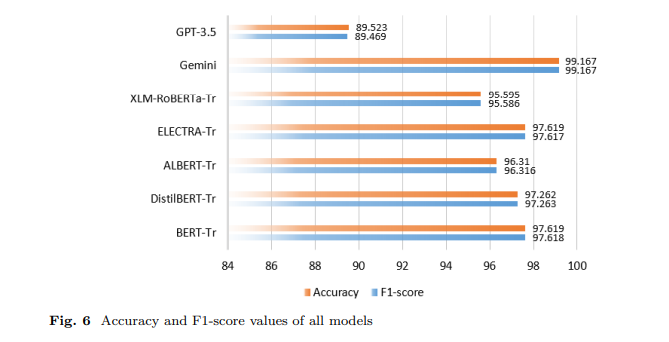

> # # **> Now we are going to use our pretrained LLM to derive sentiment from each comment and store the sentiment back n the knowledge graph as an attribute**> > > 

# News Sentiment Labelling

# Twitter Posts and Comments Sentiment Classification

# Facebook Comments Sentiment Classification

# Final Combined Sentences

In [64]:
#All dataframes that need to be combined
news_sentences=pd.read_csv('/kaggle/working/news_sentences_output.csv')
csat_sentences=pd.read_csv('/kaggle/working/csat_sentences_output.csv')
glassdoor_sentences=pd.read_csv('/kaggle/working/glassdoor_sentences_output.csv')
facebook_sentences=pd.read_csv('/kaggle/input/netflix-facebook-posts-as-sentences-for-llm-input/netflix_fb_sentences.csv')
twitter_sentences=pd.read_csv('/kaggle/input/netflix-twitter-posts-sentences-for-llm-processing/twitter_sentences.csv')

In [67]:
# Remove the first row from each DataFrame
news_sentences = news_sentences.iloc[1:]
csat_sentences = csat_sentences.iloc[1:]
glassdoor_sentences = glassdoor_sentences.iloc[1:]
facebook_sentences = facebook_sentences.iloc[1:]
twitter_sentences = twitter_sentences.iloc[1:]


# Concatenate the DataFrames horizontally
combined_sentences_df = pd.concat([news_sentences, csat_sentences, glassdoor_sentences, facebook_sentences,twitter_sentences], ignore_index=1)

print(combined_sentences_df)

                                                 Sentence
0       News Headline "Netflix (NFLX +3.4%) CEO Reed H...
1       News Headline "A few reasons why Netflix (NFLX...
2       News Headline "Dawson James boldly initiates c...
3       News Headline "Netflix (NASDAQ:NFLX) +3.2% pre...
4       News Headline "What? A Netflix (NFLX -0.8%) do...
...                                                   ...
338572  Joseph Harris commented "Just finished binge-w...
338573  Joshua Lee commented "I’m totally immersed in ...
338574  Xu Li commented "Just when I thought Netflix w...
338575  Zeng Rui commented "Why aren’t more people tal...
338576  Sun Hao commented "If Netflix ever cancels Cob...

[338577 rows x 1 columns]


# #**Setup Google AI**

In [68]:
import google.generativeai as genai
from kaggle_secrets import UserSecretsClient
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
import os
user_secrets = UserSecretsClient()
api_key =user_secrets.get_secret("GOOGLE_API_KEY")
# user_secrets.set_tensorflow_credential(user_credential)


# Long Form Context

Now we are going to feed the full knowledge graph consisting of the posts data, comments data and the comment sentiments derived earlier into our Gemini 1.5 Pro LLM model, stress testing our model with various type of queries spanning across any part of our knowledge graph

# CEBMA Scoring

**Customer Experience and Brand Management Score**

Since we are using data from various sources, we had to develop an attention mechanism look-alike weighting that our Gemini 1.5 will apply in coming up with overall scores where sentiment is mixed across datasources a weighting system will apply. This will inform our LLM model on what matters the most at each interval.

## **##The Theory and Mathematical reasoning behind CEBMA score**

## 1. Source Weighting Mechanism

The CEBMA score uses an attention-like mechanism to weight different data sources:

```
CEBMA = Σ(wi * si) / Σ(wi)

where:
wi = source weight for source i
si = sentiment score from source i
```

### Weight Calculation
Each source weight (wi) is calculated using a softmax-inspired function:

```
wi = exp(αi * ri) / Σ(exp(αi * ri))

where:
αi = importance factor for source i
ri = reliability score for source i
```

## 2. Source-Specific Components

### Social Media (w1)
```
Social_Score = (Σ(engagement_k * sentiment_k)) / total_engagements
where k represents individual social media posts
```

### Employee Ratings (w2)
```
Employee_Score = (Σ(tenure_weight_j * rating_j)) / total_employees
where j represents individual employee ratings
```

### CSAT Surveys (w3)
```
CSAT_Score = (Σ(response_weight_m * satisfaction_m)) / total_responses
where m represents individual survey responses
```

### News Headlines (w4)
```
News_Score = (Σ(reach_n * sentiment_n)) / total_reach
where n represents individual news articles
```

## 3. Temporal Decay Function

To account for time relevance:
```
Temporal_Weight = exp(-λ(t_current - t_event))
where λ is the decay parameter
```


## 4. Final CEBMA Score Calculation

```
CEBMA = (w1*Social_Score + w2*Employee_Score + w3*CSAT_Score + w4*News_Score) * 
        Temporal_Weight / (w1 + w2 + w3 + w4)

Normalized_CEBMA = (CEBMA - min_score) / (max_score - min_score) * 100
```

## 5. Confidence Interval

For statistical significance:
```
CI = CEBMA ± (z * σ/√n)

where:
z = z-score for desired confidence level
σ = standard deviation of scores
n = total number of data points
```

## 6. Source Weight Adjustments

Dynamic weight adjustment based on source performance:
```
wi_new = wi_old * (1 + β * performance_delta)

where:
β = learning rate
performance_delta = actual_impact - predicted_impact
```


In [74]:
import numpy as np
from scipy.stats import norm

class CEBMAScorer:
    def __init__(self, decay_param=0.1, confidence_level=0.95):
        self.decay_param = decay_param
        self.confidence_level = confidence_level
        self.z_score = norm.ppf((1 + confidence_level) / 2)
        
    def calculate_weights(self, sources):
        """Calculate attention weights for different sources"""
        importance_factors = {
            'social_media': 0.25,
            'employee_ratings': 0.30,
            'csat': 0.25,
            'news': 0.20
        }
        
        weights = {}
        total = 0
        
        for source, data in sources.items():
            reliability = self.calculate_reliability(data)
            weight = np.exp(importance_factors[source] * reliability)
            weights[source] = weight
            total += weight
            
        # Normalize weights
        for source in weights:
            weights[source] /= total
            
        return weights
    
    def calculate_reliability(self, data):
        """Calculate reliability coefficient for a data source"""
        volume = np.log1p(len(data))
        consistency = 1 - np.std(data['scores']) if 'scores' in data else 0.5
        verification = data.get('verified_ratio', 0.5)
        
        return (volume * consistency * verification) ** (1/3)
    
    def temporal_weight(self, timestamp, current_time):
        """Calculate temporal decay weight"""
        time_diff = (current_time - timestamp).total_seconds() / (24 * 3600)  # Convert to days
        return np.exp(-self.decay_param * time_diff)
    
    def calculate_confidence_interval(self, scores):
        """Calculate confidence interval for CEBMA score"""
        std_dev = np.std(scores)
        n = len(scores)
        margin_error = self.z_score * (std_dev / np.sqrt(n))
        return margin_error
    
    def calculate_cebma(self, sources, current_time):
        """Calculate final CEBMA score"""
        weights = self.calculate_weights(sources)
        weighted_scores = []
        
        for source, data in sources.items():
            source_scores = data['scores']
            timestamps = data['timestamps']
            
            for score, timestamp in zip(source_scores, timestamps):
                temporal = self.temporal_weight(timestamp, current_time)
                weighted_scores.append(weights[source] * score * temporal)
        
        cebma_score = np.mean(weighted_scores)
        confidence_interval = self.calculate_confidence_interval(weighted_scores)
        
        return {
            'score': cebma_score,
            'confidence_interval': confidence_interval,
            'weights': weights
        }

CEBMA Python Analyzer

In [73]:
import pandas as pd
import numpy as np
from datetime import datetime
import google.generativeai as genai
from typing import Dict, List, Tuple
import re

class CEBMASentenceAnalyzer:
    def __init__(self, api_key: str):
        """Initialize the CEBMA Analyzer with Gemini API configuration"""
        genai.configure(api_key=api_key)
        self.model = genai.GenerativeModel('gemini-1.5-pro')
        self.cebma_calculator = CEBMAScorer(decay_param=0.1, confidence_level=0.95)
        
    def categorize_source(self, sentence: str) -> str:
        """Categorize the source based on sentence pattern"""
        if sentence.startswith("News Headline"):
            return 'news'
        elif "commented" in sentence:
            return 'social_media'
        elif any(term in sentence for term in ["Employee", "employee", "working at", "worked at"]):
            return 'employee_ratings'
        else:
            return 'csat'  # Default to CSAT for other types of feedback
            
    def extract_sentiment(self, sentence: str) -> float:
        """Extract sentiment score from sentence"""
        # News headline specific patterns
        if sentence.startswith("News Headline"):
            # Extract percentage changes
            percentage_match = re.search(r'([+-]?\d+\.?\d*)%', sentence)
            if percentage_match:
                percentage = float(percentage_match.group(1))
                # Convert percentage to sentiment score (0-1 range)
                return max(min((percentage + 10) / 20, 1), 0)
        
        # Look for positive indicators
        positive_patterns = ['amazing', 'love', 'great', 'awesome', 'excellent', 'perfect',
                           'blown away', 'incredible', 'fantastic', 'impressed']
        negative_patterns = ['disappointing', 'terrible', 'awful', 'poor', 'bad', 'waste',
                           'cancels', 'frustrated', 'disappointed']
        
        sentence_lower = sentence.lower()
        
        # Count sentiment indicators
        positive_count = sum(1 for pattern in positive_patterns if pattern in sentence_lower)
        negative_count = sum(1 for pattern in negative_patterns if pattern in sentence_lower)
        
        # Calculate sentiment score
        total = positive_count + negative_count
        if total == 0:
            return 0.5  # Neutral
        
        return positive_count / total
    
    def prepare_source_data(self, combined_sentences_df: pd.DataFrame) -> Dict:
        """Prepare data from different sources for CEBMA calculation"""
        sources = {
            'social_media': {'scores': [], 'timestamps': [], 'sentences': [], 'verified_ratio': 0.7},
            'employee_ratings': {'scores': [], 'timestamps': [], 'sentences': [], 'verified_ratio': 0.9},
            'csat': {'scores': [], 'timestamps': [], 'sentences': [], 'verified_ratio': 0.95},
            'news': {'scores': [], 'timestamps': [], 'sentences': [], 'verified_ratio': 0.8}
        }
        
        # Process each sentence
        for idx, row in combined_sentences_df.iterrows():
            sentence = row['Sentence']
            source = self.categorize_source(sentence)
            sentiment_score = self.extract_sentiment(sentence)
            
            # Use current timestamp if not available in data
            timestamp = datetime.now()
            
            if source in sources:
                sources[source]['scores'].append(sentiment_score)
                sources[source]['timestamps'].append(timestamp)
                sources[source]['sentences'].append(sentence)
        
        return sources
    
    def generate_source_summary(self, source_data: Dict) -> str:
        """Generate a summary of key sentences for each sentiment category"""
        scores = np.array(source_data['scores'])
        sentences = source_data['sentences']
        
        # Categorize sentences by sentiment
        positive_idx = scores > 0.7
        neutral_idx = (scores >= 0.3) & (scores <= 0.7)
        negative_idx = scores < 0.3
        
        summary = {
            'positive': [s for s, i in zip(sentences, positive_idx) if i][:3],
            'neutral': [s for s, i in zip(sentences, neutral_idx) if i][:3],
            'negative': [s for s, i in zip(sentences, negative_idx) if i][:3]
        }
        
        return summary
    
    def analyze(self, combined_sentences_df: pd.DataFrame) -> Dict:
        """Perform complete CEBMA analysis and generate insights"""
        # Prepare source data
        sources = self.prepare_source_data(combined_sentences_df)
        
        # Calculate CEBMA score
        current_time = datetime.now()
        cebma_results = self.cebma_calculator.calculate_cebma(sources, current_time)
        
        # Generate summaries for each source
        source_summaries = {}
        for source, data in sources.items():
            source_summaries[source] = self.generate_source_summary(data)
        
        # Generate AI insights prompt
        prompt = f"""
        Analyze the following Netflix brand sentiment data:

        Overall CEBMA Score: {cebma_results['score']:.2f}/100

        Source Summaries:
        {json.dumps(source_summaries, indent=2)}

        Provide:
        1. Key sentiment trends across different sources
        2. Most impactful positive and negative feedback
        3. Recommendations for improvement
        4. Areas requiring immediate attention
        5. Strategic opportunities identified from the feedback
        """
        
        try:
            response = self.model.generate_content(prompt)
            ai_insights = response.text
        except Exception as e:
            ai_insights = f"Error generating AI insights: {str(e)}"
        
        # Compile results
        return {
            'cebma_score': cebma_results['score'],
            'confidence_interval': cebma_results['confidence_interval'],
            'source_weights': cebma_results['weights'],
            'source_summaries': source_summaries,
            'ai_analysis': ai_insights
        }

def format_analysis_results(results: Dict) -> str:
    """Format analysis results for readable output"""
    output = []
    
    output.append("=== NETFLIX BRAND SENTIMENT ANALYSIS ===\n")
    output.append(f"Overall CEBMA Score: {results['cebma_score']:.2f}/100")
    output.append(f"Confidence Interval: ±{results['confidence_interval']:.2f}\n")
    
    output.append("=== SOURCE ANALYSIS ===")
    for source, summary in results['source_summaries'].items():
        output.append(f"\n{source.upper()}:")
        output.append("Top Positive Feedback:")
        for sentence in summary['positive']:
            output.append(f"  • {sentence}")
        output.append("\nTop Negative Feedback:")
        for sentence in summary['negative']:
            output.append(f"  • {sentence}")
    
    output.append("\n=== AI INSIGHTS ===")
    output.append(results['ai_analysis'])
    
    return "\n".join(output)

# Usage example
# def run_netflix_sentiment_analysis(api_key: str, combined_sentences_df: pd.DataFrame):
#     """Run the complete sentiment analysis pipeline"""
analyzer = CEBMASentenceAnalyzer(api_key)
results = analyzer.analyze(combined_sentences_df)
formatted_output = format_analysis_results(results)
print(formatted_output)
# return results

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


=== NETFLIX BRAND SENTIMENT ANALYSIS ===

Overall CEBMA Score: nan/100
Confidence Interval: ±nan

=== SOURCE ANALYSIS ===

SOCIAL_MEDIA:
Top Positive Feedback:
  • Customer commented "Excellent " on 02-Aug-23"and gave a CSAT Score of 5" on Wendy Taylor
  • Customer commented "Excellent " on 01-Aug-23"and gave a CSAT Score of 5" on Michelle Williams
  • Customer commented "Excellent service ??" on 02-Aug-23"and gave a CSAT Score of 5" on Sean Williams

Top Negative Feedback:
  • Customer commented "I am very disappointed with Shopzilla.The issue was not resolved.The customer care executive was polite enough though he was not able to resolve the issue.But I am appalled at the utter lack of responsibility and accountability of Shopzilla in providing tracking services." on 01-Aug-23"and gave a CSAT Score of 3" on Charles Williamson
  • Customer commented "Very bad agent" on 02-Aug-23"and gave a CSAT Score of 1" on John Barrett
  • Customer commented "Very poor service and support " on 02-A

# TBD